In [1]:
import pandas  as pd
import numpy   as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [102]:
df = pd.read_csv("F1_4_Detailed releases at facility level with E-PRTR Sector and Annex I Activity detail into Air.csv")


C:\Users\hudso\AppData\Local\Temp\ipykernel_6960\2809092414.py:1: DtypeWarning: Columns (7,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("F1_4_Detailed releases at facility level with E-PRTR Sector and Annex I Activity detail into Air.csv")


In [103]:
df.columns

Index(['countryName', 'EPRTRSectorCode', 'eprtrSectorName',
       'EPRTRAnnexIMainActivityCode', 'EPRTRAnnexIMainActivityLabel',
       'FacilityInspireID', 'facilityName',
       'facilityNameConfidentialityReason', 'Longitude', 'Latitude',
       'addressConfidentialityReason', 'City', 'targetRelease', 'pollutant',
       'emissions', 'reportingYear', 'releasesConfidentialityReason'],
      dtype='object')

In [105]:
df2 = df[df["countryName"]=="Poland"]
np.unique(df2["pollutant"])

array(['1,1,2,2-tetrachloroethane (TETRACHLOROETHANE-1,1,2,2)',
       '1,2-dichloroethane (DCE-1,2)', 'Aldrin', 'Ammonia (NH3)',
       'Anthracene', 'Arsenic and compounds (as As)', 'Benzene',
       'CONFIDENTIAL', 'Cadmium and compounds (as Cd)',
       'Carbon dioxide (CO2)', 'Carbon monoxide (CO)',
       'Chlorine and inorganic compounds (as HCl)',
       'Chlorofluorocarbons (CFCs)', 'Chromium and compounds (as Cr)',
       'Copper and compounds (as Cu)',
       'Di-(2-ethyl hexyl) phthalate (DEHP)', 'Dichloromethane (DCM)',
       'Ethylene oxide', 'Fluorine and inorganic compounds (as HF)',
       'Halons', 'Hydro-fluorocarbons (HFCS)',
       'Hydrochlorofluorocarbons (HCFCs)', 'Hydrogen cyanide (HCN)',
       'Lead and compounds (as Pb)', 'Mercury and compounds (as Hg)',
       'Methane (CH4)', 'Naphthalene', 'Nickel and compounds (as Ni)',
       'Nitrogen oxides (NOX)', 'Nitrous oxide (N2O)',
       'Non-methane volatile organic compounds (NMVOC)',
       'PCDD + PCDF (di

In [53]:
df = pd.read_csv("provincies_dataframe4.csv")

In [54]:
df.head()

,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,SHAPE_LENG,SHAPE_AREA,REGON,EMISS_TRAF,EMIS_SEAPO,EMIS_LCP,EMIS_CHEMI,EMIS_ENERG,EMIS_LIVES,EMIS_MINER,EMIS_PAPER,EMIS_METAL,EMIS_WASTE,PM10,TOTAL_FACT
0,2289315,32,zachodniopomorskie,12.132354,3.107943,81168387600000,69.80,91.33,445.229000,0.0,501.5,0.0,0.0,107.0,0.0,0.0,19.200000,769.63
1,1398751,8,lubuskie,11.091431,1.838502,97789593100000,53.04,0.00,68.889500,54.2,77.8,0.0,116.0,119.0,0.0,0.0,19.971429,420.04
2,1994777,2,dolnośląskie,13.846094,2.559169,93193464400000,130.86,0.00,466.001000,0.0,365.0,0.0,0.0,0.0,0.0,0.0,25.000000,495.86
3,2982700,30,wielkopolskie,18.409792,3.932200,63125781600000,263.66,0.00,808.854000,0.0,62.6,132.0,140.0,55.0,0.0,0.0,25.555556,653.26
4,1831001,22,pomorskie,11.708411,2.689451,19167483600000,114.78,221.36,265.783004,0.0,58.7,0.0,0.0,0.0,0.0,54.0,20.009091,448.84


In [55]:
df.columns

Index(['JPT_POWIER', 'JPT_KOD_JE', 'JPT_NAZWA_', 'SHAPE_LENG', 'SHAPE_AREA',
       'REGON', 'EMISS_TRAF', 'EMIS_SEAPO', 'EMIS_LCP', 'EMIS_CHEMI',
       'EMIS_ENERG', 'EMIS_LIVES', 'EMIS_MINER', 'EMIS_PAPER', 'EMIS_METAL',
       'EMIS_WASTE', 'PM10', 'TOTAL_FACT'],
      dtype='object')

In [56]:
#df = df[["EMISS_TRAF","EMIS_SEAPO","EMIS_LCP","EMIS_CHEMI","EMIS_ENERG","EMIS_LIVES","EMIS_MINER","EMIS_PAPER","EMIS_METAL","EMIS_WASTE","PM10","TOTAL_FACT"]]
df = df[["PM10","EMISS_TRAF","EMIS_SEAPO","EMIS_CHEMI","EMIS_ENERG","EMIS_LIVES","EMIS_MINER","EMIS_PAPER","EMIS_METAL","EMIS_WASTE"]]
df.head()

,PM10,EMISS_TRAF,EMIS_SEAPO,EMIS_CHEMI,EMIS_ENERG,EMIS_LIVES,EMIS_MINER,EMIS_PAPER,EMIS_METAL,EMIS_WASTE
0,19.200000,69.80,91.33,0.0,501.5,0.0,0.0,107.0,0.0,0.0
1,19.971429,53.04,0.00,54.2,77.8,0.0,116.0,119.0,0.0,0.0
2,25.000000,130.86,0.00,0.0,365.0,0.0,0.0,0.0,0.0,0.0
3,25.555556,263.66,0.00,0.0,62.6,132.0,140.0,55.0,0.0,0.0
4,20.009091,114.78,221.36,0.0,58.7,0.0,0.0,0.0,0.0,54.0


In [57]:
len(df)

16

In [58]:
df = df.dropna()

In [59]:
df = pd.DataFrame(StandardScaler().fit_transform(df))

In [60]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

params = {'learning_rate': 0.1,  # 0.01
          'n_estimators': 22,    # 100
          'max_depth': 7}        # 20

model = xgb.XGBRegressor(**params) 

#model = GridSearchCV(xgbr, params,cv=7, verbose=2, scoring = 'r2', return_train_score=True)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9446552252441954

In [98]:
feature_names = list(["Traffic","Seaport","Chemical_industries","Energy_sector","Livestock","Mineral_industry","Paper_and_wood_production","Metal_production","Waste_management"])

In [62]:
scores = cross_val_score(model, X_train, y_train,cv=2)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: -0.46


In [63]:
kfold = KFold(n_splits=2, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: -0.47


In [64]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 1.47
RMSE: 1.21


In [65]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [66]:
#X_train.columns = ["wind_speed","elevation","indust_sum","prop_agric","HubDist","AADTTOTAL"]
#X_train.columns = ["industry_sum","agriculture_prop","dirty_powerplant","traffic"]

In [67]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 1.44
RMSE: 1.20


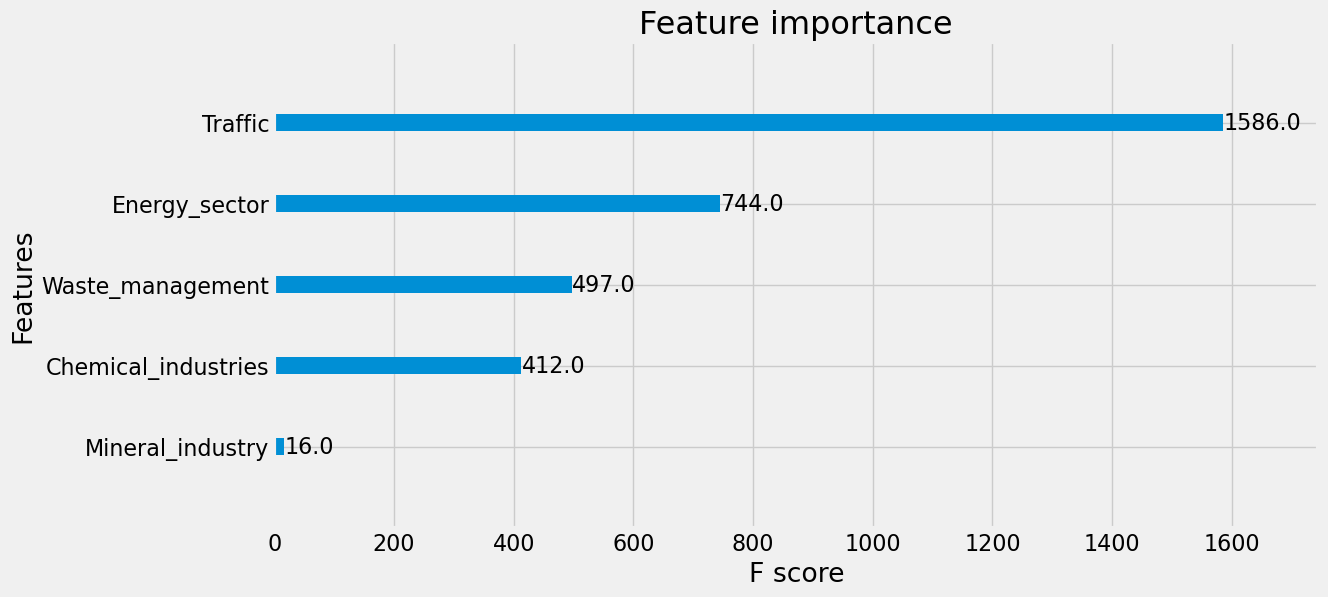

In [99]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

regressor.get_booster().feature_names = feature_names

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=9, ax=ax)
plt.show();

In [74]:
regressor.feature_importances_*100

array([ 3.7777894,  0.       , 13.147801 , 62.720905 ,  0.       ,
        0.072608 ,  0.       ,  0.       , 20.280897 ], dtype=float32)